In [1]:
import pandas as pd, numpy as np

In [2]:
data = pd.read_csv(r"D:\Nihal Kumar\Study_Notes\Part_2_UD\PCA\PCA Demo I\Iris.csv")

In [3]:
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
y=data.pop('iris')

In [5]:
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X = data.copy()

In [10]:
x = scaler.fit_transform(X)

In [11]:
x[:5,:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [12]:
#Applying PCA on the data
from sklearn.decomposition import PCA

In [13]:
pca = PCA(random_state=42)

In [14]:
pca.fit(x)

PCA(random_state=42)

In [15]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [16]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [17]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

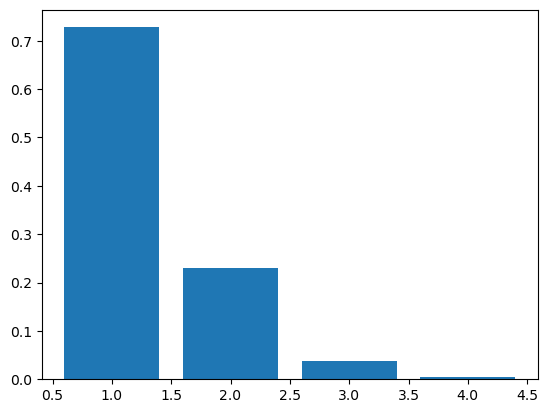

In [19]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

In [20]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

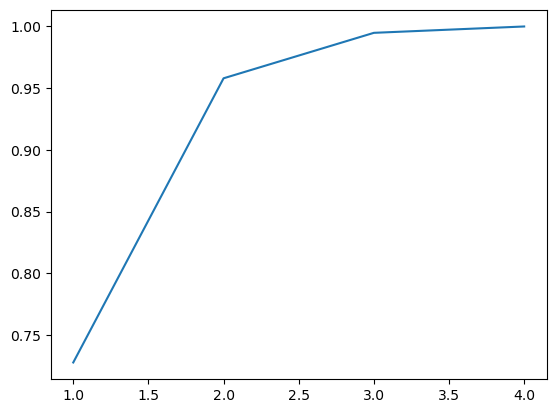

In [22]:
#Making the scree plot
plt.plot(range(1,len(var_cumu)+1),var_cumu)

In [23]:
#PCA with 2 components
pc2 = PCA(n_components=2, random_state=42)

In [24]:
newdata = pc2.fit_transform(x)

In [25]:
newdata.shape

(150, 2)

In [27]:
df = pd.DataFrame(newdata, columns=['PC1','PC2'])
df.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [28]:
df_final = pd.concat([df,y],axis=1)

In [29]:
df_final.head()

,PC1,PC2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [30]:
import seaborn as sns

C:\Users\uie72014\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


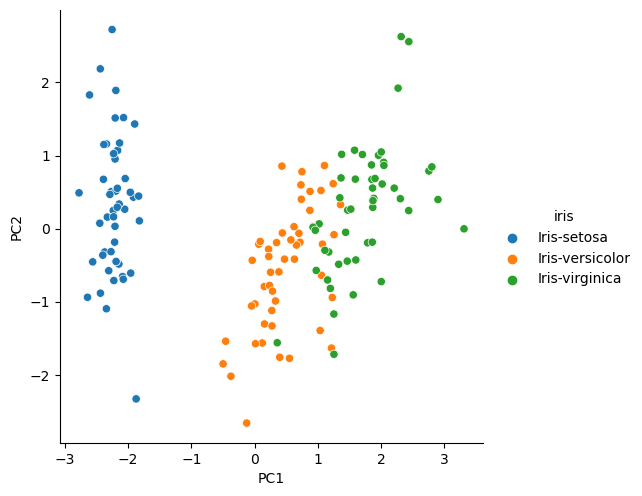

In [31]:
sns.pairplot(data=df_final,x_vars=['PC1'],y_vars=['PC2'],hue='iris',size=5)